# task 1: data import

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
import seaborn as sns


In [2]:
#importing csv file and label headings
heart_data_csv = "heart_failure_clinical_records_dataset.csv"
heart_data = pd.read_csv(heart_data_csv,decimal = ',')

In [3]:
#check labeling of columns
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
#check size of imported data matches the size of our csv file
heart_data.shape

(299, 13)

In [5]:
#check headings line up with column data
heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [6]:
#check the data types of columns match what type of data they represent
heart_data.dtypes
#we can see age, serum_creatinine and serum_sodium are objects, these can be cast to float and int respectively

age                         object
anaemia                      int64
creatinine_phosphokinase     int64
diabetes                     int64
ejection_fraction            int64
high_blood_pressure          int64
platelets                   object
serum_creatinine            object
serum_sodium                 int64
sex                          int64
smoking                      int64
time                         int64
DEATH_EVENT                  int64
dtype: object

In [7]:
#check if any is null before we perform corrections on columns
heart_data.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [8]:
# we can see on https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records
#that attribute age is expressed in years. we have some float values. we will round these to ints
heart_data['age'] = heart_data.age.astype(float).astype(int)


In [9]:
#we will replace the 1 and 0 in sex with M or F. This will be easier to read later in our graphs
heart_data['sex'].replace(0, 'F',inplace=True)
heart_data['sex'].replace(1, 'M',inplace=True)

In [10]:
#cast to float
heart_data['serum_creatinine'] = heart_data.serum_creatinine.astype(float)

In [11]:
#cast to int
heart_data['serum_sodium'] = heart_data.serum_sodium.astype(int)

In [12]:
#we can see some float objects with value 263358.03 given the range of numbers it is a safe 
#assumption that this bit of float will have no effect on data. so we will cast to int
heart_data['platelets'] = heart_data.platelets.astype(float).astype(int)

In [13]:
#our data now has no nulls and correct data type. 
heart_data.dtypes

age                           int32
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int32
serum_creatinine            float64
serum_sodium                  int32
sex                          object
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [14]:
# we will now check the uniqueness of each column to check for anomilies
heart_data.age.unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56])

In [15]:
heart_data.anaemia.unique()

array([0, 1], dtype=int64)

In [16]:
heart_data.creatinine_phosphokinase.unique()

array([ 582, 7861,  146,  111,  160,   47,  246,  315,  157,  123,   81,
        231,  981,  168,   80,  379,  149,  125,   52,  128,  220,   63,
        148,  112,  122,   60,   70,   23,  249,  159,   94,  855, 2656,
        235,  124,  571,  127,  588, 1380,  553,  129,  577,   91, 3964,
         69,  260,  371,   75,  607,  789,  364, 7702,  318,  109,   68,
        250,  110,  161,  113, 5882,  224,   92,  102,  203,  336,   76,
         55,  280,   78,   84,  115,   66,  897,  154,  144,  133,  514,
         59,  156,   61,  305,  898, 5209,   53,  328,  748, 1876,  936,
        292,  369,  143,  754,  400,   96,  737,  358,  200,  248,  270,
       1808, 1082,  719,  193, 4540,  646,  281, 1548,  805,  291,  482,
        943,  185,  132, 1610, 2261,  233,   30, 1846,  335,   58,  910,
         72,  130, 2334, 2442,  776,  196,  835, 3966,  171,  198,   95,
       1419,  478,  176,  395,   99,  145,  104, 1896,  151,  244,   62,
        121,  418,  167, 1211, 1767,  308,   97,   

In [17]:
heart_data.diabetes.unique()

array([0, 1], dtype=int64)

In [18]:
heart_data.ejection_fraction.unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

In [19]:
heart_data.high_blood_pressure.unique()

array([1, 0], dtype=int64)

In [20]:
heart_data.platelets.unique()

array([265000, 263358, 162000, 210000, 327000, 204000, 127000, 454000,
       388000, 368000, 253000, 136000, 276000, 427000,  47000, 262000,
       166000, 237000,  87000, 297000, 289000, 149000, 196000, 284000,
       153000, 200000, 360000, 319000, 302000, 188000, 228000, 226000,
       321000, 305000, 329000, 185000, 218000, 194000, 310000, 271000,
       451000, 140000, 395000, 418000, 351000, 255000, 461000, 223000,
       216000, 254000, 390000, 385000, 119000, 213000, 274000, 244000,
       497000, 374000, 122000, 243000, 266000, 317000, 283000, 324000,
       293000, 172000, 406000, 173000, 304000, 235000, 181000, 249000,
       219000, 318000, 221000, 298000, 286000, 621000, 263000, 850000,
       306000, 252000, 328000, 164000, 507000, 203000, 217000, 300000,
       267000, 227000, 250000, 295000, 231000, 211000, 348000, 229000,
       338000, 242000, 225000, 184000, 277000, 362000, 174000, 448000,
        75000, 334000, 192000, 220000,  70000, 270000, 325000, 176000,
      

In [21]:
heart_data.serum_creatinine.unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

In [22]:
heart_data.serum_sodium.unique()

array([130, 136, 129, 137, 116, 132, 131, 138, 133, 140, 127, 121, 135,
       134, 144, 128, 145, 142, 139, 146, 141, 143, 126, 124, 113, 125,
       148])

In [23]:
heart_data.sex.unique()

array(['M', 'F'], dtype=object)

In [24]:
heart_data.smoking.unique()

array([0, 1], dtype=int64)

In [25]:
heart_data.time.unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

In [26]:
heart_data.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

# Task 2: data Exploration- exploring each column

In [27]:
heart_data.dtypes

age                           int32
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int32
serum_creatinine            float64
serum_sodium                  int32
sex                          object
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

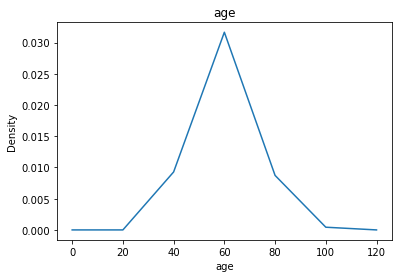

In [28]:
#we will check the age distribution of our patients
heart_data['age'].plot.kde(ind=[0,20,40,60,80,100,120])
plt.title('age')
plt.xlabel('age')
plt.show()

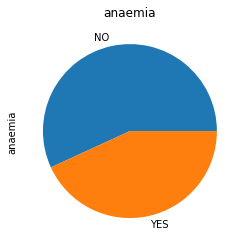

In [29]:
pie_anaemia = (heart_data['anaemia'])
pie_anaemia = pie_anaemia.copy(deep=True)
pie_anaemia.replace(0, 'NO',inplace=True)
pie_anaemia.replace(1, 'YES',inplace=True)
pie_anaemia.value_counts().plot(kind='pie')
plt.title('anaemia')
plt.show()

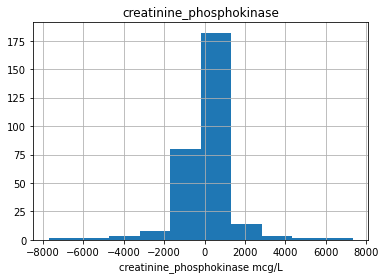

In [30]:
heart_data['creatinine_phosphokinase'].diff().hist();
plt.title('creatinine_phosphokinase')
plt.xlabel('creatinine_phosphokinase mcg/L')
plt.show()

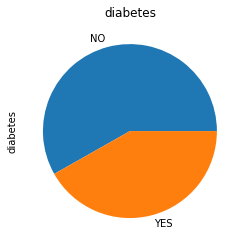

In [31]:
pie_dia = (heart_data['diabetes'])
pie_dia =pie_dia.copy(deep=True)
pie_dia.replace(0, 'NO',inplace=True)
pie_dia.replace(1, 'YES',inplace=True)
pie_dia.value_counts().plot(kind='pie')
plt.title('diabetes')
plt.show()

In [32]:
heart_data['diabetes'].value_counts()
#58% did not have diabetes, 42% do have diabetes

0    174
1    125
Name: diabetes, dtype: int64

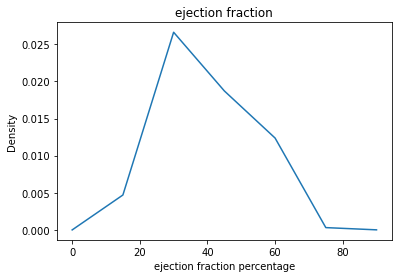

In [33]:
heart_data['ejection_fraction'].plot.kde(ind=[0,15,30,45,60,75,90])
plt.title('ejection fraction')
plt.xlabel('ejection fraction percentage')
plt.show()

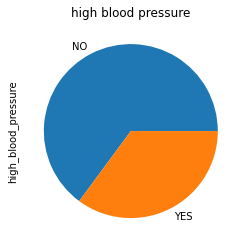

In [34]:
pie_high = (heart_data['high_blood_pressure'])
pie_high =pie_high.copy(deep=True)
pie_high.replace(0, 'NO',inplace=True)
pie_high.replace(1, 'YES',inplace=True)
pie_high.value_counts().plot(kind='pie')
plt.title('high blood pressure')
plt.show()

In [35]:
pie_high.value_counts()

NO     194
YES    105
Name: high_blood_pressure, dtype: int64

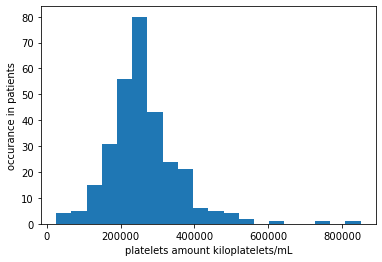

In [36]:
plt.hist(heart_data['platelets'], density=False, bins=20) 
plt.ylabel('occurance in patients')
plt.xlabel('platelets amount kiloplatelets/mL');

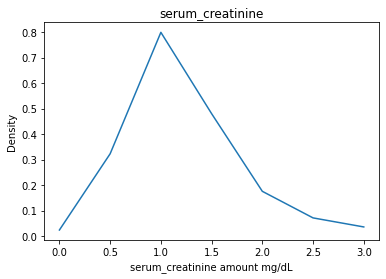

In [37]:
heart_data['serum_creatinine'].plot.kde(ind=[0,0.5,1,1.5,2,2.5,3])
plt.title('serum_creatinine')
plt.xlabel('serum_creatinine amount mg/dL')
plt.show()

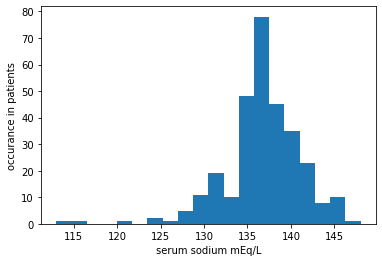

In [38]:
plt.hist(heart_data['serum_sodium'], density=False, bins=20) 
plt.ylabel('occurance in patients')
plt.xlabel('serum sodium mEq/L');

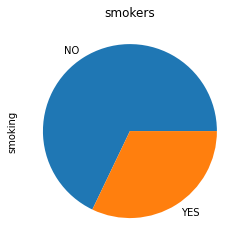

In [39]:
pie_smoking =heart_data['smoking']
pie_smoking =pie_smoking.copy(deep=True)
pie_smoking.replace(0, 'NO',inplace=True)
pie_smoking.replace(1, 'YES',inplace=True)
pie_smoking.value_counts().plot(kind='pie')
plt.title('smokers')
plt.show()

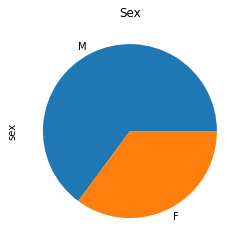

In [40]:
#we will check if we have equal male and female participant so we can account for this if not
heart_data['sex'].value_counts().plot(kind='pie')
plt.title('Sex')
plt.show()

In [41]:
heart_data['sex'].value_counts()

M    194
F    105
Name: sex, dtype: int64

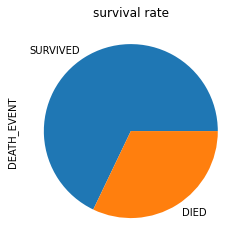

In [42]:
pie_death = (heart_data['DEATH_EVENT'])
pie_death =pie_death.copy(deep=True)
pie_death.replace(0, 'SURVIVED',inplace=True)
pie_death.replace(1, 'DIED',inplace=True)
pie_death.value_counts().plot(kind='pie')
plt.title('survival rate')
plt.show()

In [43]:
heart_data['DEATH_EVENT'].value_counts()
#68% lived, and 32% died

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# task 2: Data Exploration- relationships between columns

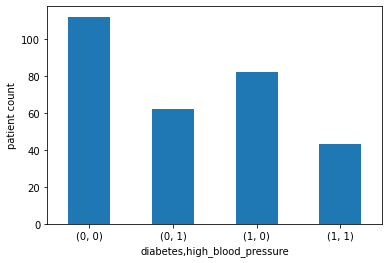

In [44]:
#assumption 1- i have assumed that a high blood pressure will be more likely 
#in patients with diabetes- this should be taken into consideration when 
#considering a link between high blood pressure and its relationship with heart failure
df = heart_data.groupby('diabetes')['high_blood_pressure'].value_counts()
plt.ylabel('patient count')

ax = df.plot.bar(x='lab', y='val', rot=0)


In [45]:
df.value_counts()

62     1
43     1
82     1
112    1
Name: high_blood_pressure, dtype: int64

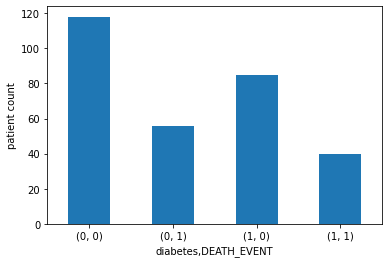

In [46]:
#assumption 2- diabetes increases chance of death event
df2 = heart_data.groupby('diabetes')['DEATH_EVENT'].value_counts()
plt.ylabel('patient count')

ax = df2.plot.bar(x='lab', y='val', rot=0)


In [47]:
df2.value_counts()

118    1
85     1
40     1
56     1
Name: DEATH_EVENT, dtype: int64

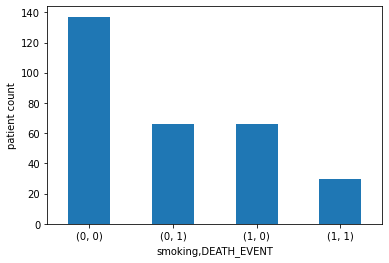

In [48]:
#assumption 3- smoking increases chance of death event
df3 = heart_data.groupby('smoking')['DEATH_EVENT'].value_counts()
plt.ylabel('patient count')

ax = df3.plot.bar(x='lab', y='val', rot=0)

In [49]:
df3.value_counts()

66     2
137    1
30     1
Name: DEATH_EVENT, dtype: int64

[None]

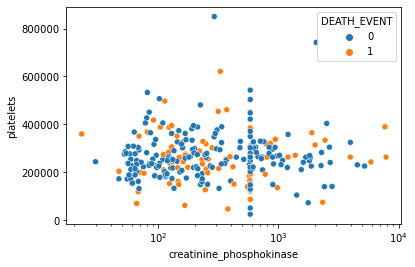

In [50]:
graph =sns.scatterplot(x="creatinine_phosphokinase", y="platelets",
              hue="DEATH_EVENT",
              data=heart_data);
graph.set(xscale="log")
#assumption 4- I assumed there would be some kind of relationship between platelets count and creatine_phosphokinase
#that could be used to predict a death event. 

[None]

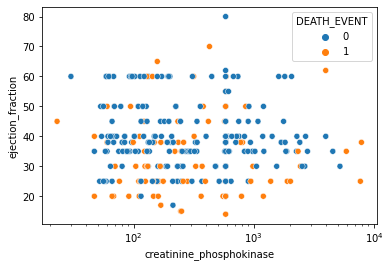

In [51]:
#Assumption 5- I assumed there would be some kind of relationship between creatinine_phosphokinase and ejection_fraction that
#could be used to predict a death event
graph =sns.scatterplot(x="creatinine_phosphokinase", y="ejection_fraction",
              hue="DEATH_EVENT",
              data=heart_data);
graph.set(xscale="log")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

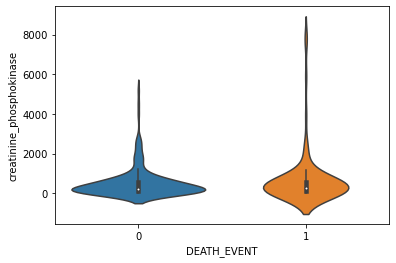

In [52]:
#assumption 6- high levels of creatinine_phosphokinase increase chances of a death event
sns.violinplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=heart_data)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

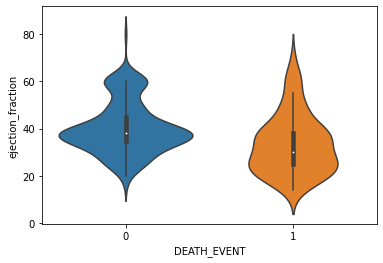

In [53]:
#assumption 7- high levels of ejection fraction increase chances of a death event
sns.violinplot(x="DEATH_EVENT", y="ejection_fraction", data=heart_data)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

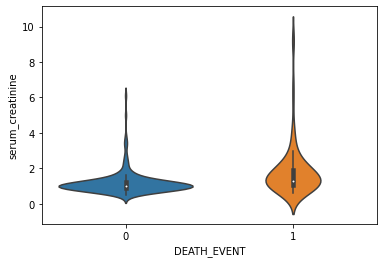

In [54]:
#assumption 8- high levels of serum creatine increase chances of a death event
sns.violinplot(x="DEATH_EVENT", y="serum_creatinine", data=heart_data)

[None]

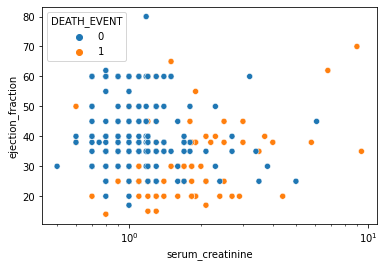

In [55]:
#assumption 9- serum creatinine and ejection fraction can be used to predict death event- a log is addded for easier visual
graph =sns.scatterplot(x="serum_creatinine", y="ejection_fraction",
              hue="DEATH_EVENT",
              data=heart_data);
graph.set(xscale="log")

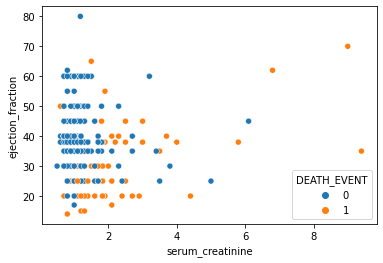

In [56]:
#without log
graph =sns.scatterplot(x="serum_creatinine", y="ejection_fraction",
              hue="DEATH_EVENT",
              data=heart_data);


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

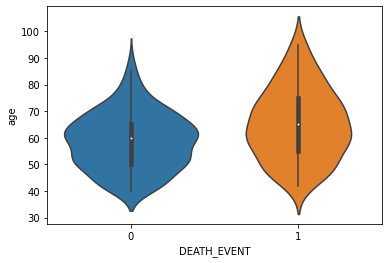

In [57]:
#assumption 10- younger people are more likely to not experience a death event
sns.violinplot(x="DEATH_EVENT", y="age", data=heart_data)

# Task : 3 classifcation

#from our assumption 9 we can see a clear set of data that defines serum_creatinine and ejection_fraction having an effect on DEATH_EVENT. we will use these in our models

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
heartFilters= heart_data.filter(["serum_creatinine", "ejection_fraction"])

In [60]:
target= heart_data["DEATH_EVENT"]

80/20 split

In [61]:
xTrain, xTest, yTrain, yTest = train_test_split(heartFilters, target, test_size = 0.2, random_state=1)

In [62]:
#find the best k and p value for the model
from sklearn.neighbors import KNeighborsClassifier
bestVal = 0
bestK = -1
bestP = -1
for k in range(1,100):
    for p in range(1,10):
        clf = KNeighborsClassifier(k, p=p)
        clf.fit(xTrain, yTrain)
        predicted = clf.predict(xTest)
        score = clf.score(xTest, yTest)
        if score>bestVal:
            bestVal = score
            bestK = k
            bestP = p 
        #if score is much worse than best score stop running 
    print('kval = {} , score = {} | (bestVal ={} k={} p={} {})'.format(k,score,bestVal, bestK, bestP, "\n END"))

kval = 1 , score = 0.7166666666666667 | (bestVal =0.7166666666666667 k=1 p=1 
 END)
kval = 2 , score = 0.8333333333333334 | (bestVal =0.8333333333333334 k=2 p=1 
 END)
kval = 3 , score = 0.8166666666666667 | (bestVal =0.8333333333333334 k=2 p=1 
 END)
kval = 4 , score = 0.8666666666666667 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 5 , score = 0.8166666666666667 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 6 , score = 0.85 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 7 , score = 0.85 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 8 , score = 0.8333333333333334 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 9 , score = 0.8166666666666667 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 10 , score = 0.8666666666666667 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 11 , score = 0.8666666666666667 | (bestVal =0.8666666666666667 k=4 p=1 
 END)
kval = 12 , score = 0.8833333333333333 | (bestVal =0.8833333333333333 k=12 p=1 
 END)
kval = 13 , scor

 END)


In [63]:
clf = KNeighborsClassifier(bestK, p=bestP)
fit = clf.fit(xTrain, yTrain)

In [64]:
from sklearn.metrics import confusion_matrix
yPre = fit.predict(xTest)
fit = clf.score(xTest, yTest)
cm = confusion_matrix(yTest, yPre)
from sklearn.metrics import classification_report
print (classification_report(yTest,yPre))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        46
           1       0.89      0.57      0.70        14

    accuracy                           0.88        60
   macro avg       0.89      0.77      0.81        60
weighted avg       0.88      0.88      0.87        60



In [65]:
predicted = clf.predict(xTest)
score = clf.score(xTest, yTest)

In [66]:
predicted

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
score

0.8833333333333333

60/40

In [68]:
xTrain, xTest, yTrain, yTest = train_test_split(heartFilters, target, test_size = 0.4, random_state=1)

In [69]:
#find the best k and p value for the model
from sklearn.neighbors import KNeighborsClassifier
bestVal = 0
bestK = -1
bestP = -1
for k in range(1,100):
    for p in range(1,10):
        clf = KNeighborsClassifier(k, p=p)
        clf.fit(xTrain, yTrain)
        predicted = clf.predict(xTest)
        score = clf.score(xTest, yTest)
        if score>bestVal:
            bestVal = score
            bestK = k
            bestP = p 
        #if score is much worse than best score stop running 
    print('kval = {} , score = {} | (bestVal ={} k={} p={} {})'.format(k,score,bestVal, bestK, bestP, "\n END"))

kval = 1 , score = 0.7583333333333333 | (bestVal =0.7583333333333333 k=1 p=1 
 END)
kval = 2 , score = 0.7583333333333333 | (bestVal =0.7583333333333333 k=1 p=1 
 END)
kval = 3 , score = 0.7833333333333333 | (bestVal =0.7833333333333333 k=3 p=1 
 END)
kval = 4 , score = 0.775 | (bestVal =0.7833333333333333 k=3 p=1 
 END)
kval = 5 , score = 0.775 | (bestVal =0.7833333333333333 k=3 p=1 
 END)
kval = 6 , score = 0.7833333333333333 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 7 , score = 0.775 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 8 , score = 0.7833333333333333 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 9 , score = 0.775 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 10 , score = 0.7833333333333333 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 11 , score = 0.7916666666666666 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 12 , score = 0.7916666666666666 | (bestVal =0.7916666666666666 k=6 p=1 
 END)
kval = 13 , score = 0.7833333333333333 | 

In [70]:
clf = KNeighborsClassifier(bestK, p=bestP)
fit = clf.fit(xTrain, yTrain)

In [71]:
from sklearn.metrics import confusion_matrix
yPre = fit.predict(xTest)
fit = clf.score(xTest, yTest)
cm = confusion_matrix(yTest, yPre)
from sklearn.metrics import classification_report
print (classification_report(yTest,yPre))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        84
           1       0.70      0.53      0.60        36

    accuracy                           0.79       120
   macro avg       0.76      0.72      0.73       120
weighted avg       0.78      0.79      0.78       120



In [72]:
predicted = clf.predict(xTest)
score = clf.score(xTest, yTest)

In [73]:
predicted

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [74]:
score

0.7916666666666666

50/50

In [75]:
xTrain, xTest, yTrain, yTest = train_test_split(heartFilters, target, test_size = 0.5, random_state=1)

In [76]:
#find the best k and p value for the model
from sklearn.neighbors import KNeighborsClassifier
bestVal = 0
bestK = -1
bestP = -1
for k in range(1,100):
    for p in range(1,10):
        clf = KNeighborsClassifier(k, p=p)
        clf.fit(xTrain, yTrain)
        predicted = clf.predict(xTest)
        score = clf.score(xTest, yTest)
        if score>bestVal:
            bestVal = score
            bestK = k
            bestP = p 
        #if score is much worse than best score stop running 
    print('kval = {} , score = {} | (bestVal ={} k={} p={} {})'.format(k,score,bestVal, bestK, bestP, "\n END"))

kval = 1 , score = 0.7066666666666667 | (bestVal =0.7066666666666667 k=1 p=1 
 END)
kval = 2 , score = 0.7133333333333334 | (bestVal =0.72 k=2 p=1 
 END)
kval = 3 , score = 0.7466666666666667 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 4 , score = 0.7133333333333334 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 5 , score = 0.7 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 6 , score = 0.7333333333333333 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 7 , score = 0.7333333333333333 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 8 , score = 0.7333333333333333 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 9 , score = 0.7333333333333333 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 10 , score = 0.74 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 11 , score = 0.74 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 12 , score = 0.7333333333333333 | (bestVal =0.7533333333333333 k=3 p=1 
 END)
kval = 13 , score = 0.7333333333333333 | (best

In [77]:
clf = KNeighborsClassifier(bestK, p=bestP)
fit = clf.fit(xTrain, yTrain)

In [78]:
from sklearn.metrics import confusion_matrix
yPre = fit.predict(xTest)
fit = clf.score(xTest, yTest)
cm = confusion_matrix(yTest, yPre)
from sklearn.metrics import classification_report
print (classification_report(yTest,yPre))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        98
           1       0.67      0.56      0.61        52

    accuracy                           0.75       150
   macro avg       0.73      0.71      0.72       150
weighted avg       0.75      0.75      0.75       150



In [79]:
predicted = clf.predict(xTest)
score = clf.score(xTest, yTest)

In [80]:
predicted

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [81]:
score

0.7533333333333333

# Decision tree


80/20

In [82]:
from sklearn.tree import DecisionTreeClassifier
treeCLF = DecisionTreeClassifier()

In [83]:
xTrain, xTest, yTrain, yTest = train_test_split(heartFilters, target, test_size = 0.2, random_state=1)

In [84]:
fit = treeCLF.fit(xTrain, yTrain)

In [85]:
yPre = fit.predict(xTest)

In [86]:
predicted = fit.predict(xTest)
score = fit.score(xTest, yTest)

In [87]:
predicted

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [88]:
score

0.7333333333333333

In [89]:
print (classification_report(yTest,yPre))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80        46
           1       0.46      0.79      0.58        14

    accuracy                           0.73        60
   macro avg       0.69      0.75      0.69        60
weighted avg       0.81      0.73      0.75        60



60/40

In [90]:
xTrain, xTest, yTrain, yTest = train_test_split(heartFilters, target, test_size = 0.4, random_state=1)

In [91]:
fit = treeCLF.fit(xTrain, yTrain)

In [92]:
yPre = fit.predict(xTest)

In [93]:
predicted = fit.predict(xTest)
score = fit.score(xTest, yTest)

In [94]:
predicted

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [95]:
score

0.7416666666666667

In [96]:
print (classification_report(yTest,yPre))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        84
           1       0.59      0.47      0.52        36

    accuracy                           0.74       120
   macro avg       0.69      0.66      0.67       120
weighted avg       0.73      0.74      0.73       120



50/50

In [97]:
xTrain, xTest, yTrain, yTest = train_test_split(heartFilters, target, test_size = 0.5, random_state=1)

In [98]:
fit = treeCLF.fit(xTrain, yTrain)

In [99]:
yPre = fit.predict(xTest)

In [100]:
predicted = fit.predict(xTest)
score = fit.score(xTest, yTest)

In [101]:
predicted

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [102]:
score

0.74

In [103]:
print (classification_report(yTest,yPre))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81        98
           1       0.67      0.50      0.57        52

    accuracy                           0.74       150
   macro avg       0.72      0.68      0.69       150
weighted avg       0.73      0.74      0.73       150

